In [1]:
# ----Import libraries
 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


exp = pd.read_csv('https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct.gz', sep='\t', skiprows=2, index_col='Description')
exp.drop(columns = 'Name', inplace = True)

In [2]:
exp = exp[['Brain - Amygdala',
       'Brain - Anterior cingulate cortex (BA24)',
       'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere',
       'Brain - Cerebellum', 'Brain - Cortex', 'Brain - Frontal Cortex (BA9)',
       'Brain - Hippocampus', 'Brain - Hypothalamus',
       'Brain - Nucleus accumbens (basal ganglia)',
       'Brain - Putamen (basal ganglia)', 'Brain - Spinal cord (cervical c-1)',
       'Brain - Substantia nigra']]

0


c:\Users\melis\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


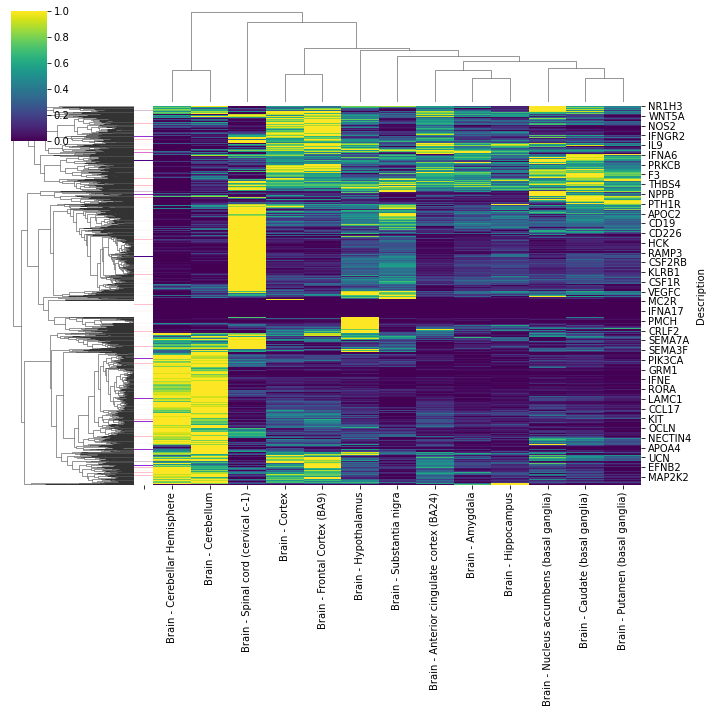

1


c:\Users\melis\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


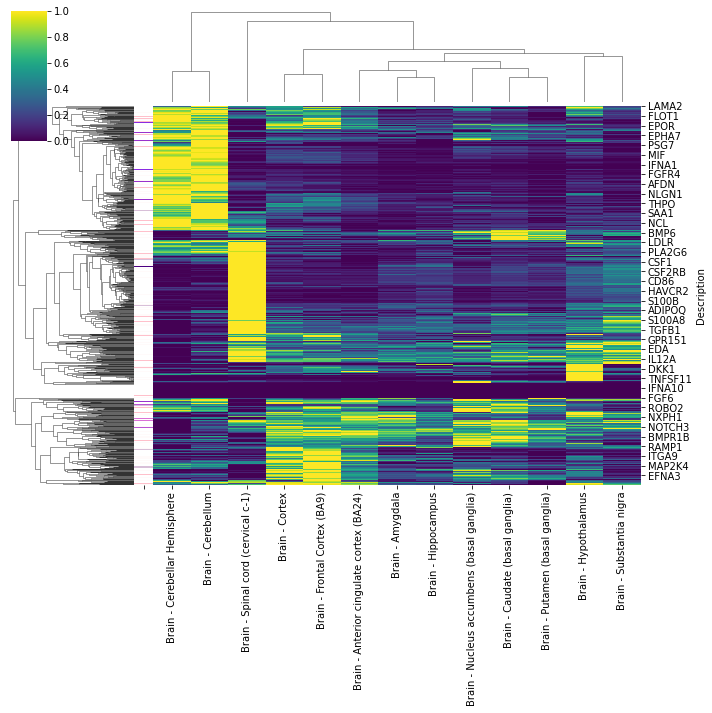

2


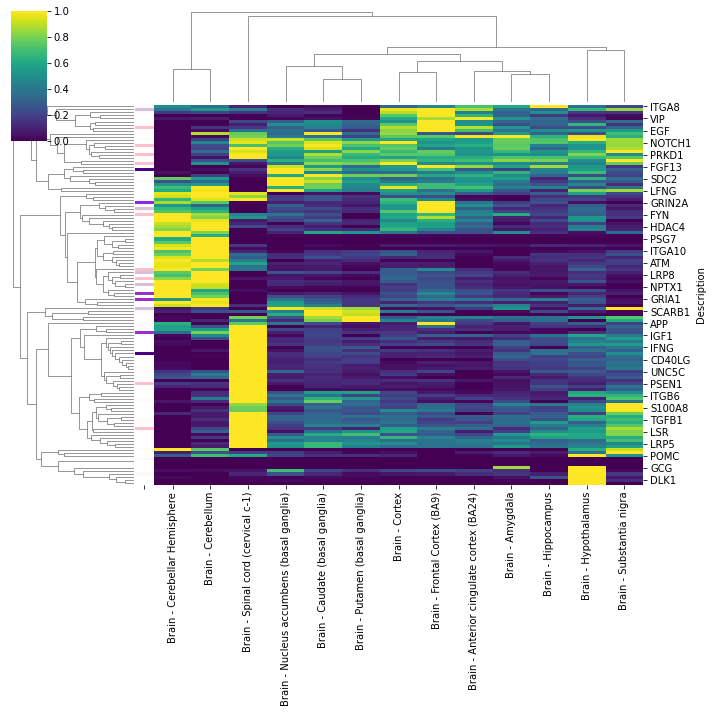

In [155]:
gen = pd.read_csv('/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/hot-encoded-diseases.csv', index_col = 0)
gen = gen[~gen.index.duplicated(keep='first')]

reslist = [0.1, 0.4, 0.7]

for res in range(0,len(reslist)):

    genes = pd.read_csv('processed_data/03-LR_network_visualisation/louvain_largest_cluster_%s.csv' % reslist[res], index_col = 1)

    scaler = MinMaxScaler()
    print(res)
    if (res == 0):
        df = exp.loc[list(genes.drop(['CCL4L1', 'ICAM4', 'GDF1', 'HJV', 'CCL3L1', 'LILRA3','C4B_2', 'CILK1', 'CCN2', 'SLURP2', 'KIR2DL5A', 'CCN1'], axis = 0).index.unique())]

    if (res == 1):
        df = exp.loc[list(genes.drop(['GDF1', 'CCL4L1', 'CCL3L1', 'LILRA3', 'C4B_2', 'CILK1', 'CCN2', 'SLURP2', 'KIR2DL5A', 'CCN1'], axis = 0).index.unique())]
    if (res ==2):
        df = exp.loc[list(genes.drop(['C4B_2', 'CCN1'], axis = 0).index.unique())]
    
    df_scaled = scaler.fit_transform(df.to_numpy().T)


    lut = dict(zip(gen.sum(axis=1).sort_values(ascending = True).unique(), ['snow', 'pink', 'thistle', 'orchid', 'mediumorchid', 'darkorchid', 'blueviolet', 'indigo', 'black']))
    colors = gen.sum(axis=1).map(lut)
    sns.clustermap(pd.DataFrame(df_scaled.T, columns = df.columns, index = df.index), cmap='viridis', row_colors=colors)
    plt.savefig('plots/03-LR_network_visualisation/03b-genetic_association_threshold_GTEx/major_network_%s_GTEx.png' % reslist[res], dpi=300)
    plt.show()
